In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [3]:
N=[1000,10000,100000]
a=13
x0=1
b=0
m=19
u=[]
for j in range(17):
  temp=(a*x0+b)%m
  u.append(temp/m)
  x0=temp
print(u)

[0.6842105263157895, 0.8947368421052632, 0.631578947368421, 0.21052631578947367, 0.7368421052631579, 0.5789473684210527, 0.5263157894736842, 0.8421052631578947, 0.9473684210526315, 0.3157894736842105, 0.10526315789473684, 0.3684210526315789, 0.7894736842105263, 0.2631578947368421, 0.42105263157894735, 0.47368421052631576, 0.15789473684210525]


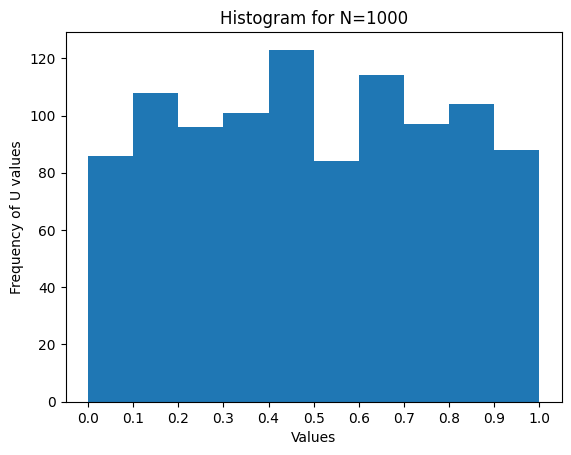

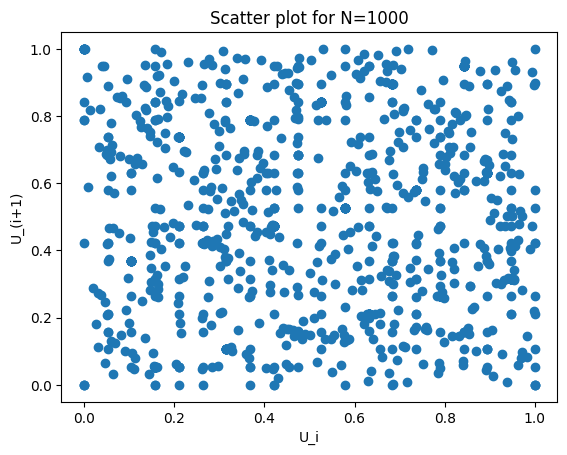

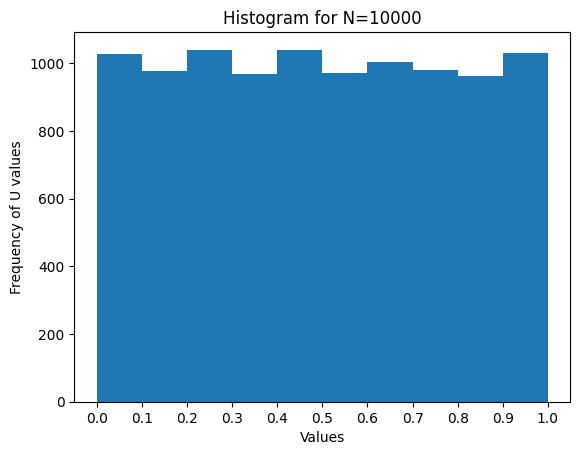

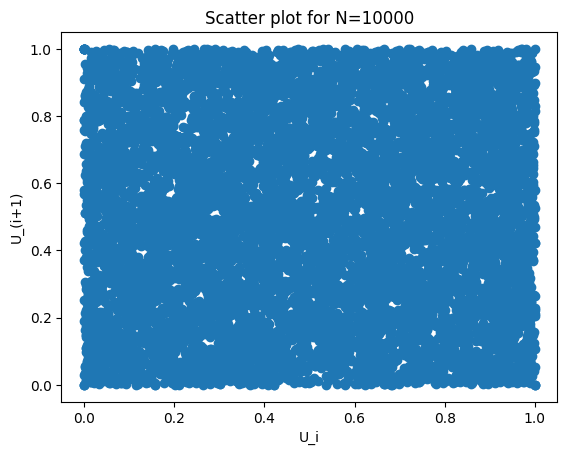

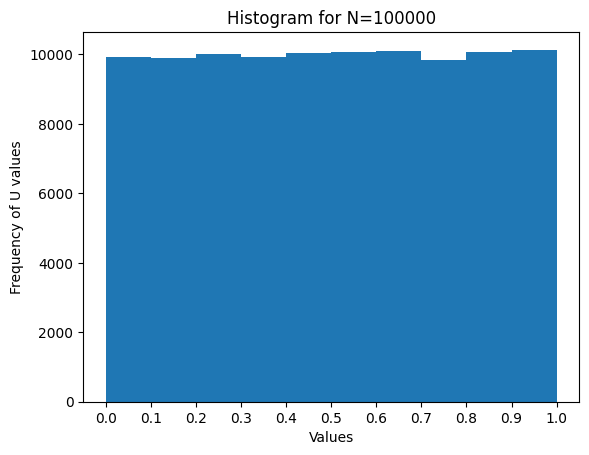

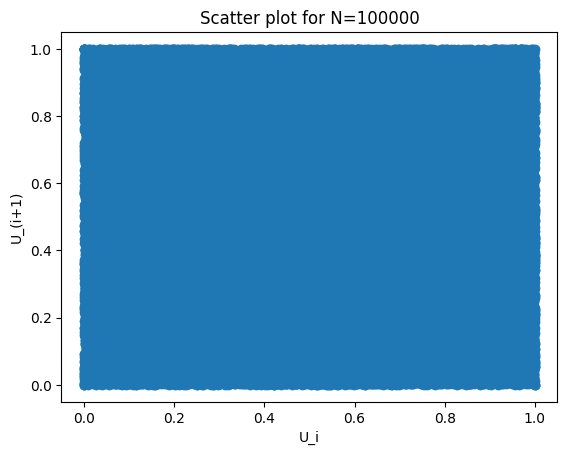

<Figure size 640x480 with 0 Axes>

In [4]:
for n in N:
  lis=list(u)
  for i in range(17,n+1):
    temp=lis[i-16]-lis[i-6]
    if temp<0:
      temp+=1
    lis.append(temp)
  _,edges,__=plt.hist(lis,bins=10)
  plt.xlabel('Values')
  plt.ylabel('Frequency of U values')
  plt.xticks(edges)
  plt.title("Histogram for N="+str(n))
  plt.show()
  plt.clf()
  plt.title("Scatter plot for N="+str(n))
  plt.xlabel('U_i')
  plt.ylabel('U_(i+1)')
  plt.scatter(lis[:-1],lis[1:])
  plt.show()
  plt.clf()




In [5]:
#2

In [6]:
def ugen(n):
  a=51749
  x0=50
  b=0
  m=244944584
  u=[float(x0/m)]
  for j in range(n-1):
    temp=(a*x0+b)%m
    u.append(float(temp/m))
    x0=temp
  return np.array(u)

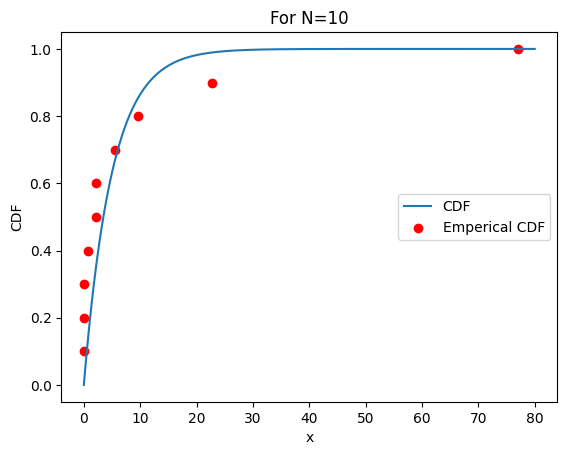

mean: 12.023656013633381
variance: 513.7094654029746


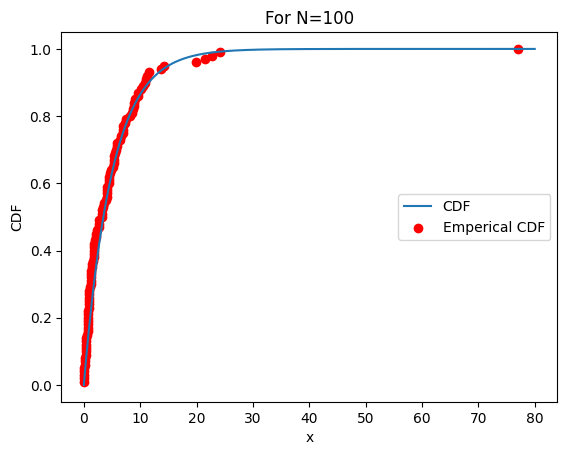

mean: 5.35710304793411
variance: 76.80012783755477


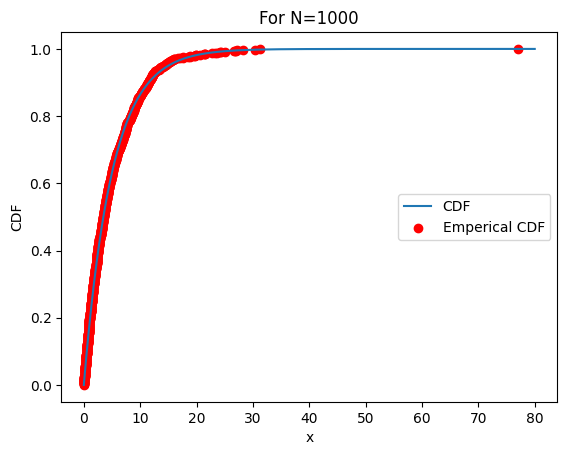

mean: 5.0513056766429
variance: 28.90401750133979


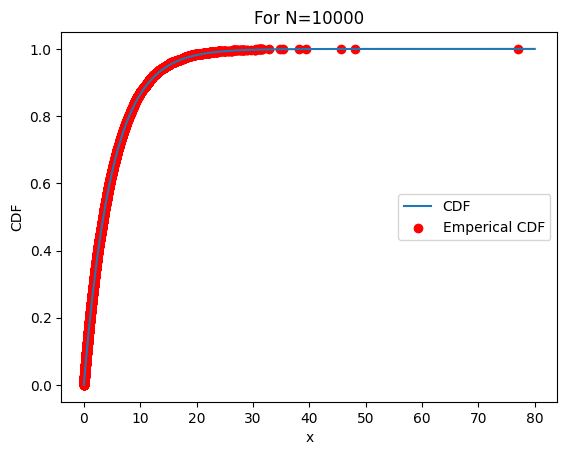

mean: 4.934059468527792
variance: 24.299273911233467


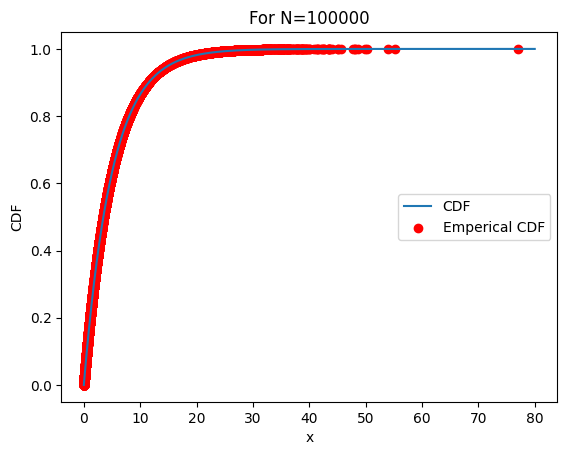

mean: 5.003441704767955
variance: 24.956866572769087


<Figure size 640x480 with 0 Axes>

In [7]:
N=[10,100,1000,10000,100000]
theta=5
for n in N:
  u=ugen(n)
  x=((-theta)*np.log(u))
  x=np.sort(x)
  y=[]
  for i in range(len(x)):
    y.append((i+1)/n)
  real_x=np.linspace(0,80,10000)
  real_y=1-np.power(np.e,-real_x/theta)
  plt.title("For N="+str(n))
  plt.plot(real_x,real_y,label="CDF")
  plt.xlabel("x")
  plt.ylabel("CDF")

  plt.scatter(x,y,color="red",label="Emperical CDF")
  plt.legend(loc="center right")
  plt.show()
  plt.clf()
  print("mean: "+str(np.mean(x)))
  print("variance: "+str(np.var(x)))






In [8]:
  #3

<ipython-input-9-fb8668e1c131>:11: RuntimeWarning: invalid value encountered in arcsin
  real_y=(2/np.pi)*(np.arcsin(np.power(real_x,0.5)))


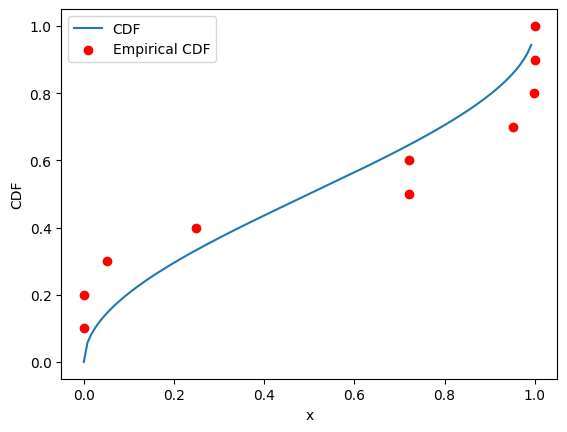

mean: 0.5692080633503068
variance: 0.17642338844262706


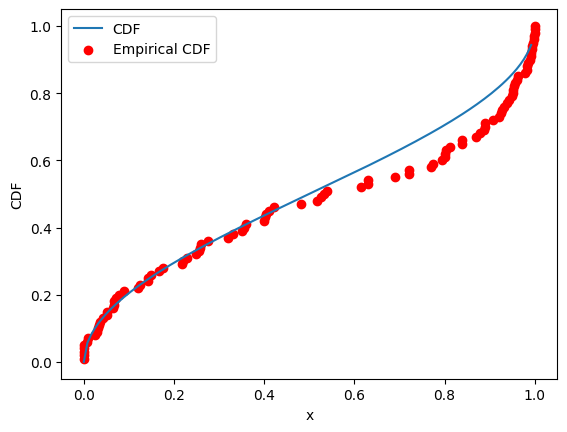

mean: 0.5380340264218898
variance: 0.14080014462646245


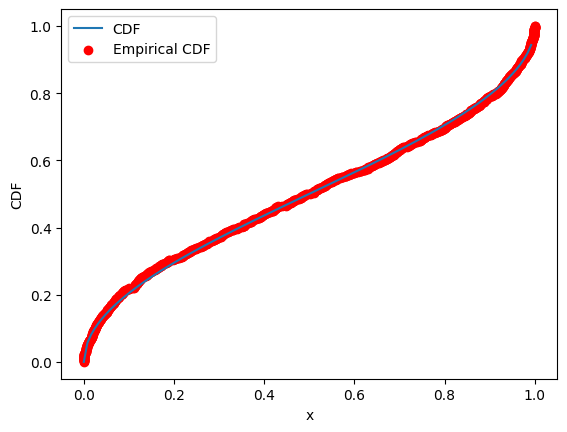

mean: 0.4991287415562954
variance: 0.1278673292365302


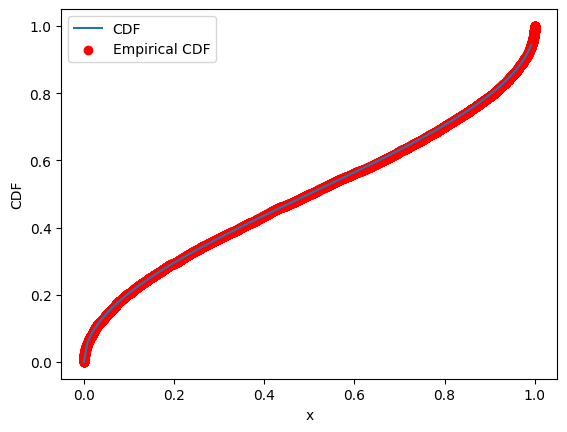

mean: 0.5030778802930173
variance: 0.12563209048980994


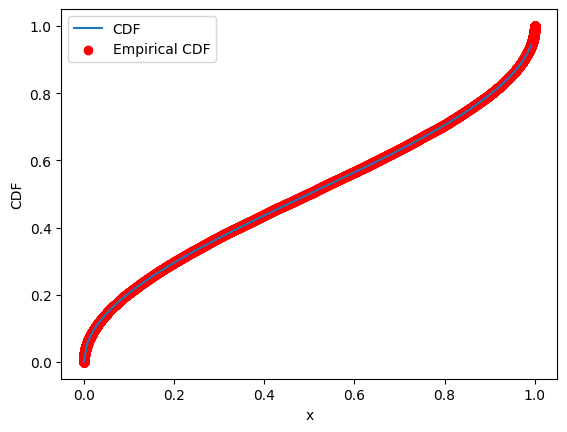

mean: 0.49916996260024904
variance: 0.125022813769086


<Figure size 640x480 with 0 Axes>

In [9]:
N=[10,100,1000,10000,100000]
theta=5
for n in N:
  u=ugen(n)
  x=((1-np.cos((np.pi)*u))/2)
  x=np.sort(x)
  y=[]
  for i in range(len(x)):
    y.append((i+1)/n)
  real_x=np.linspace(0,80,10000)
  real_y=(2/np.pi)*(np.arcsin(np.power(real_x,0.5)))
  plt.plot(real_x,real_y,label="CDF")
  plt.xlabel("x")
  plt.ylabel("CDF")
  plt.scatter(x,y,color="red",label="Empirical CDF")
  plt.legend(loc="upper left")
  plt.show()
  plt.clf()
  print("mean: "+str(np.mean(x)))
  print("variance: "+str(np.var(x)))


In [48]:
u=ugen(100000)
c=2*np.ceil(5000*u)-1
y=[]
for i in range(10):
  y.append(str(i*1000+1)+"-"+str((i)*1000+999))
table,shi=np.histogram(c,bins=10)
df=pd.DataFrame(data=table,index=y)
#df=df.T
print(df.to_latex(column_format='|c|c|'))

\begin{tabular}{|c|c|}
\toprule
{} &      0 \\
\midrule
1-999     &   9973 \\
1001-1999 &  10087 \\
2001-2999 &  10028 \\
3001-3999 &  10043 \\
4001-4999 &   9942 \\
5001-5999 &  10029 \\
6001-6999 &   9917 \\
7001-7999 &   9971 \\
8001-8999 &   9992 \\
9001-9999 &  10018 \\
\bottomrule
\end{tabular}



<ipython-input-48-13439d0778e6>:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(column_format='|c|c|'))
